In [8]:
import pandas as pd
import os
import json
from wordcloud import WordCloud
from os import path
import matplotlib.pyplot as plt
import jieba
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_excel('clean_data.xlsx')
data

,target,userId,sellerId,timestamp,comment
0,1,127,1708,2019-10-01 00:57:45,订餐 半小时 不见 餐 催 挂 电话
1,1,1661,886,2019-10-01 00:42:07,太 不靠 谱 漏发 订单 菜 送错 早 送 小时
2,0,92758,10612,2019-10-01 00:51:18,超级 超级 喜欢 吃 每次 好开心 口味 建议 手套 戴 几双 吃 完 形象...
3,0,1639,1699,2019-10-03 00:01:56,谢谢 快递 哥哥 准时 辛苦
4,1,241839,36556,2019-10-01 00:07:56,差得 餐厅 上菜 慢 贵 餐厅 饿死 那种 面条 味道 一碗 ...
...,...,...,...,...,...
17948,0,34025,24833,2020-09-25 23:15:36,感觉 好像 发挥 稳定 几此 有好有坏 吃 日料 关注 三文鱼 中等 不...
17949,1,656,901,2020-09-25 23:17:49,订 九点 送到 十二点
17950,1,612,743,2020-09-27 23:36:59,差评 辣白菜 五花肉 石锅 拌 饭 超级 难吃 五花肉 硬 难吃 感觉 新鲜 ...
17951,1,146739,15687,2020-09-27 23:53:15,贵 好吃 老婆 几次 非要 一吃 真 难吃 蒸 没错 炒菜 油腻 菜 好...


In [10]:
def year_month_day_hour_minute_second(data):
    data['timestamp'] = data['timestamp'].astype(str)
    data['year'] = data['timestamp'].apply(lambda x: x[0:4])
    data['month'] = data['timestamp'].apply(lambda x: x[5:7])
    data['day'] = data['timestamp'].apply(lambda x: x[8:10])
    data['hour'] = data['timestamp'].apply(lambda x: x[11:13])
    data['minute'] = data['timestamp'].apply(lambda x: x[14:16])
    data['second'] = data['timestamp'].apply(lambda x: x[17:19])
    return data
data = year_month_day_hour_minute_second(data)
data.to_excel('./Q2/Q2_data.xlsx',index=None)

In [11]:
Q2_data = pd.read_excel('./Q2/Q2_data.xlsx')
Q2_data.head()

,target,userId,sellerId,timestamp,comment,year,month,day,hour,minute,second
0,1,127,1708,2019-10-01 00:57:45,订餐 半小时 不见 餐 催 挂 电话,2019,10,1,0,57,45
1,1,1661,886,2019-10-01 00:42:07,太 不靠 谱 漏发 订单 菜 送错 早 送 小时,2019,10,1,0,42,7
2,0,92758,10612,2019-10-01 00:51:18,超级 超级 喜欢 吃 每次 好开心 口味 建议 手套 戴 几双 吃 完 形象...,2019,10,1,0,51,18
3,0,1639,1699,2019-10-03 00:01:56,谢谢 快递 哥哥 准时 辛苦,2019,10,3,0,1,56
4,1,241839,36556,2019-10-01 00:07:56,差得 餐厅 上菜 慢 贵 餐厅 饿死 那种 面条 味道 一碗 ...,2019,10,1,0,7,56


In [12]:
df_month = Q2_data.melt(id_vars=['target'],value_vars=['month'],var_name='',value_name='month')
df_month.head()

,target,,month
0,1,month,10
1,1,month,10
2,0,month,10
3,0,month,10
4,1,month,10


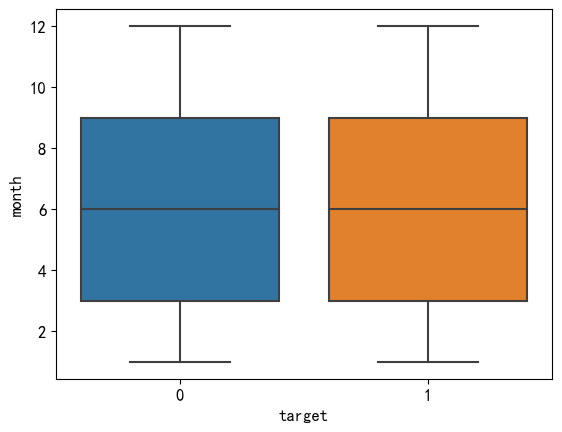

In [13]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['KaiTi','SimHei','FangSong']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
df_month.colums=['target','month']
sns.boxplot(x = 'target',y = 'month',data=df_month)
plt.show()

In [14]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model_month = ols('target~C(month)',df_month).fit()
anova_table=anova_lm(model_month)
print(anova_table)

               df       sum_sq   mean_sq        F    PR(>F)
C(month)     11.0     4.903183  0.445744  1.78579  0.050561
Residual  17941.0  4478.182207  0.249606      NaN       NaN


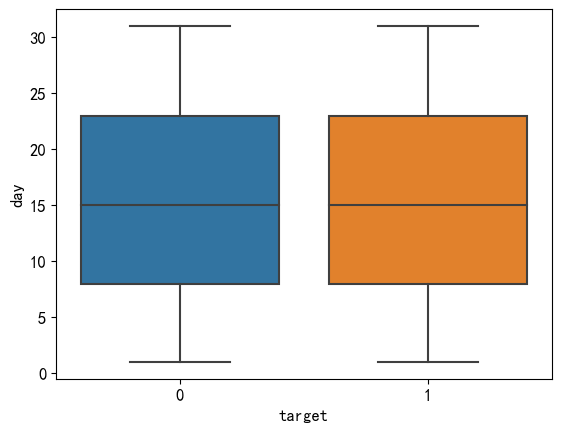

In [15]:
df_day = Q2_data.melt(id_vars=['target'],value_vars=['day'],var_name='',value_name='day')
df_day.head()
plt.rcParams['font.sans-serif'] = ['KaiTi','SimHei','FangSong']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
df_month.colums=['target','month']
sns.boxplot(x = 'target',y = 'day',data=df_day)
plt.show()

In [16]:
model_day = ols('target~C(day)',df_day).fit()
anova_table=anova_lm(model_day)
print(anova_table)

               df       sum_sq   mean_sq         F   PR(>F)
C(day)       30.0     7.405589  0.246853  0.988475  0.48353
Residual  17922.0  4475.679801  0.249731       NaN      NaN


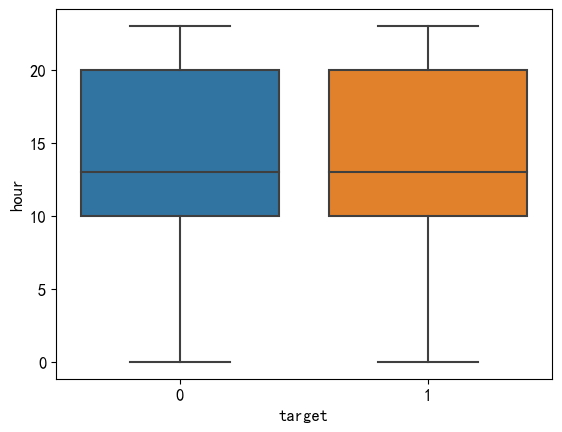

               df       sum_sq   mean_sq         F    PR(>F)
C(hour)      23.0     6.005002  0.261087  1.045554  0.401281
Residual  17929.0  4477.080387  0.249712       NaN       NaN


In [17]:
df_hour = Q2_data.melt(id_vars=['target'],value_vars=['hour'],var_name='',value_name='hour')
# df_day.head()
plt.rcParams['font.sans-serif'] = ['KaiTi','SimHei','FangSong']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
df_month.colums=['target','hour']
sns.boxplot(x = 'target',y = 'hour',data=df_hour)
plt.show()
model_hour = ols('target~C(hour)',df_hour).fit()
anova_table=anova_lm(model_hour)
print(anova_table)

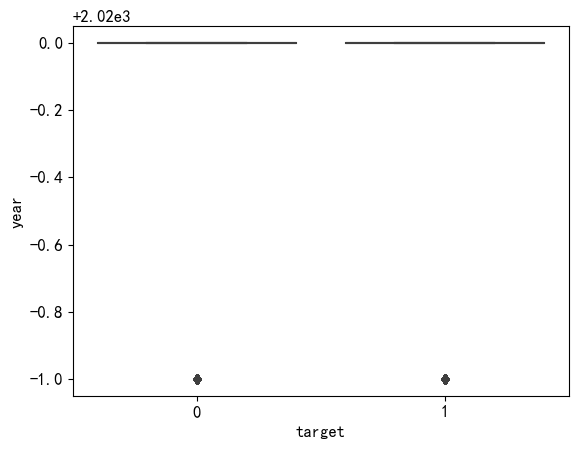

               df       sum_sq   mean_sq         F    PR(>F)
C(year)       1.0     0.351635  0.351635  1.408112  0.235386
Residual  17951.0  4482.733755  0.249721       NaN       NaN


In [18]:
df_year = Q2_data.melt(id_vars=['target'],value_vars=['year'],var_name='',value_name='year')
# df_day.head()
plt.rcParams['font.sans-serif'] = ['KaiTi','SimHei','FangSong']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
df_year.colums=['target','year']
sns.boxplot(x = 'target',y = 'year',data=df_year)
plt.show()
model_year = ols('target~C(year)',df_year).fit()
anova_table=anova_lm(model_year)
print(anova_table)